In [61]:
import pandas as pd
import os
from ast import literal_eval
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
DATA_DIR = './drive/MyDrive/(22-1)캡스톤/recomm/data/raw_data'

#1. Clustering

In [53]:
solvedProblem_level = pd.read_csv(os.path.join(DATA_DIR, 'solvedProblem_level.csv'))
solvedProblem_level = solvedProblem_level[['handle', 'count', 'Counter_object']]

In [54]:
solvedProblem_level

,handle,count,Counter_object
0,0000000000,633.0,"{3: 103, 1: 72, 2: 78, 12: 15, 4: 58, 6: 40, 1..."
1,0000064,130.0,"{4: 21, 9: 5, 3: 24, 7: 10, 5: 8, 2: 15, 11: 3..."
2,0000sb,9.0,"{9: 1, 1: 5, 7: 1, 2: 1, 11: 1}"
3,0004poppop,126.0,"{4: 6, 3: 15, 9: 8, 12: 11, 10: 14, 11: 15, 8:..."
4,001,227.0,"{4: 19, 6: 18, 13: 3, 1: 71, 15: 12, 5: 9, 3: ..."
...,...,...,...
59888,zzzzlll,6.0,"{10: 2, 11: 3, 6: 1}"
59889,zzzzong123,3.0,"{9: 1, 15: 1, 6: 1}"
59890,zzzzz9887,27.0,"{3: 10, 2: 6, 1: 10, 4: 1}"
59891,zzzzzzzz,53.0,"{8: 9, 6: 5, 3: 8, 5: 3, 7: 5, 11: 2, 2: 4, 10..."


In [55]:
solvedProblem_level['Counter_object'] = solvedProblem_level['Counter_object'].apply(lambda x: literal_eval(x))
type(solvedProblem_level['Counter_object'][0])

dict

In [59]:
userLevel = solvedProblem_level['Counter_object'].apply(pd.Series)
userLevel

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,5.0,72.0,78.0,103.0,58.0,26.0,40.0,33.0,34.0,22.0,...,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,16.0,15.0,24.0,21.0,8.0,12.0,10.0,9.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,9.0,6.0,15.0,6.0,4.0,7.0,4.0,15.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,71.0,21.0,19.0,19.0,9.0,18.0,6.0,13.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59888,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59889,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59890,NaN,10.0,6.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59891,NaN,10.0,4.0,8.0,2.0,3.0,5.0,5.0,9.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
userLevel = userLevel.fillna(0)
userLevel.to_csv(os.path.join(DATA_DIR, "userLevel.csv"), mode="w")

##1-1. PCA

In [ ]:
userLevel = userLevel.read_csv(os.path.join(DATA_DIR, "userLevel.csv"))

In [66]:
userLevel_arr = userLevel.to_numpy()
userLevel_arr

array([[ 5., 72., 78., ...,  0.,  0.,  0.],
       [ 0., 16., 15., ...,  0.,  0.,  0.],
       [ 0.,  5.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0., 10.,  6., ...,  0.,  0.,  0.],
       [ 0., 10.,  4., ...,  0.,  0.,  0.],
       [ 0., 12.,  8., ...,  0.,  0.,  0.]])

In [67]:
# normalize
userLevel_arr = (userLevel_arr-np.min(userLevel_arr))/(np.max(userLevel_arr)-np.min(userLevel_arr))
userLevel_arr

array([[0.00352609, 0.05077574, 0.05500705, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0112835 , 0.01057828, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00352609, 0.00070522, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00705219, 0.00423131, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00705219, 0.00282087, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00846262, 0.00564175, ..., 0.        , 0.        ,
        0.        ]])

In [76]:
# pca
pca  = sklearn.decomposition.PCA(n_components=2)
pca.fit(userLevel_arr)
pca_arr = pca.transform(userLevel_arr)

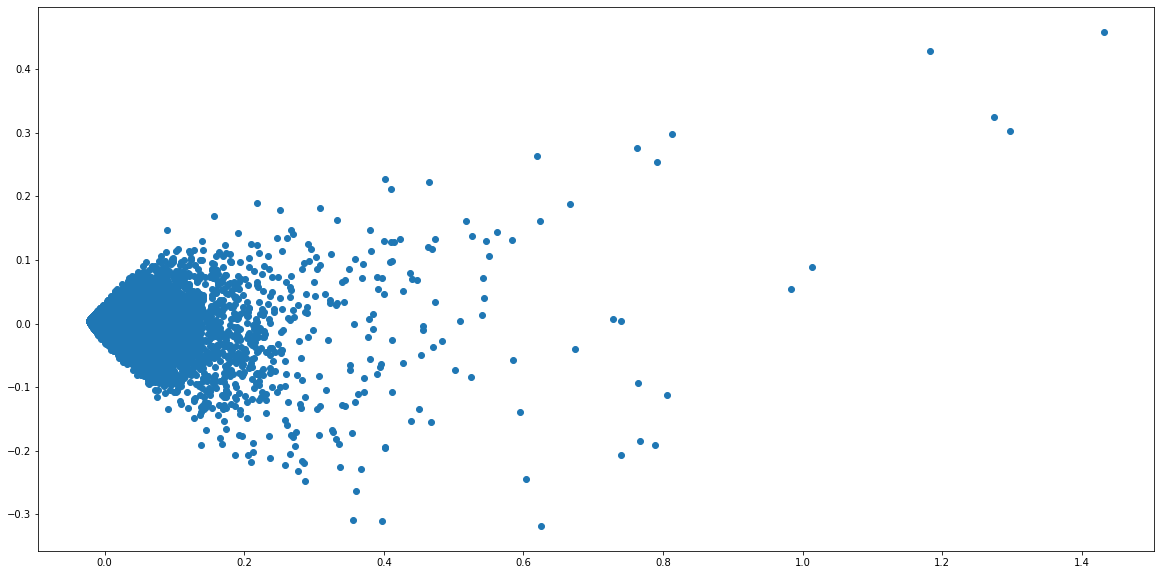

In [79]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.scatter(pca_arr[:,0],pca_arr[:,1])
#plt.savefig("image.png")